# Logistic Regression — Sigmoid Function

So far, models have been used to predict continuous values.
In many real problems, however, the goal is **classification**.

This notebook introduces logistic regression by focusing on:
- binary classification
- linear scores
- the sigmoid function as a probability mapping

No training or optimization is performed yet.
The focus is on **why sigmoid is required**.


## Binary Classification Problem

In binary classification, the target variable takes one of two values:

$$
y \in \{0, 1\}
$$

Examples include:
- spam vs not spam
- pass vs fail
- disease vs no disease

A model must output not just a label, but a **confidence** in its prediction.


## Why Linear Regression Fails for Classification

A linear model computes:

$$
\hat{y} = Xw + b
$$

Problems with using this directly for classification:
- Outputs are unbounded (can be $<0$ or $>1$)
- Values cannot be interpreted as probabilities
- Confidence is meaningless
- Thresholding linear outputs is unstable

We need a transformation that converts linear outputs into probabilities.


## Linear Score (Logit)

Logistic regression still begins with a linear computation:

$$
z = Xw + b
$$

This value is called a **score** or **logit**.

Interpretation:
- Large positive $z$ → strong evidence for class 1
- Large negative $z$ → strong evidence for class 0
- $z = 0$ → complete uncertainty

The score itself is not a prediction.
It must be mapped to a probability.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)


## The Sigmoid Function

The sigmoid function maps any real number to the open interval $(0, 1)$:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Key properties:
- Output is always between 0 and 1
- Smooth and differentiable
- Monotonic increasing
- Symmetric around $z = 0$

This makes sigmoid suitable for probabilistic modeling.


## Why Sigmoid Exists

Sigmoid solves several problems at once:

- **Bounding:** ensures outputs are valid probabilities
- **Smoothness:** enables gradient-based optimization later
- **Interpretability:** outputs can be read as confidence
- **Continuity:** avoids hard thresholds that break learning

Sigmoid is not arbitrary.
It is a design choice driven by mathematical and engineering constraints.


In [2]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))


In [3]:
test_values = np.array([-1000, -50, -10, 0, 10, 50, 1000])
sigmoid(test_values)


array([7.12457641e-218, 1.92874985e-022, 4.53978687e-005, 5.00000000e-001,
       9.99954602e-001, 1.00000000e+000, 1.00000000e+000])

## Binary Dataset (2D Example)

To understand classification geometrically, we create a simple
two-dimensional dataset with two classes.

Each point belongs to either class 0 or class 1.


In [4]:
n_samples = 100

X0 = np.random.randn(n_samples // 2, 2) + np.array([-2, -2])
y0 = np.zeros(n_samples // 2)

X1 = np.random.randn(n_samples // 2, 2) + np.array([2, 2])
y1 = np.ones(n_samples // 2)

X = np.vstack([X0, X1])
y = np.hstack([y0, y1])


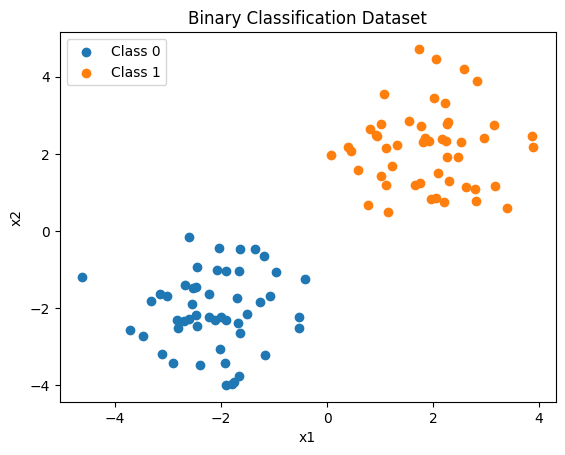

In [5]:
plt.scatter(X0[:, 0], X0[:, 1], label="Class 0")
plt.scatter(X1[:, 0], X1[:, 1], label="Class 1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Binary Classification Dataset")
plt.show()


## From Linear Score to Probability

We now compute a linear score and apply the sigmoid function.

This maps geometry (distance and direction) into probability.


In [6]:
w = np.array([0.5, -0.3])
b = 0.1

z = X @ w + b
probabilities = sigmoid(z)

probabilities[:10]


array([0.49745911, 0.39339475, 0.41414999, 0.56448289, 0.33236559,
       0.40323836, 0.5974774 , 0.27016755, 0.28890877, 0.41816254])

Each value represents:

$$
P(y = 1 \mid X)
$$

Interpretation:
- Values near 1 → confident class 1
- Values near 0 → confident class 0
- Values near 0.5 → uncertainty

Classification becomes a **probabilistic decision**, not a hard rule.


## Sigmoid Curve Visualization

The shape of the sigmoid explains learning behavior in logistic regression.


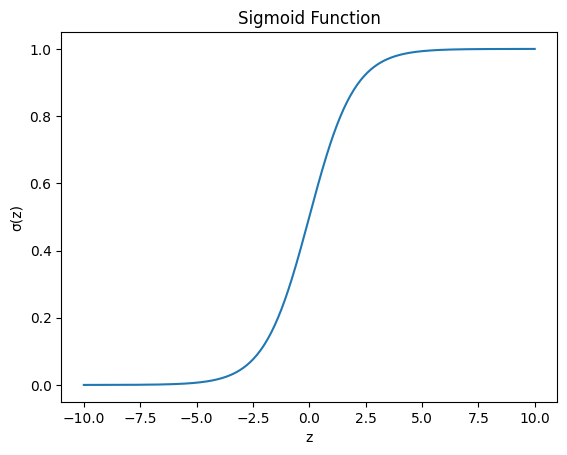

In [7]:
z_vals = np.linspace(-10, 10, 400)
sig_vals = sigmoid(z_vals)

plt.plot(z_vals, sig_vals)
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.title("Sigmoid Function")
plt.show()


Observations:
- Flat regions at extremes (saturation)
- Steep region near $z = 0$

Implications:
- Gradients vanish for extreme confidence
- Learning is fastest near the decision boundary


## Summary

- Classification requires probabilistic outputs
- Linear models produce unbounded scores
- Sigmoid maps scores to probabilities
- Geometry is preserved, interpretation changes

Logistic regression can be seen as:
**linear regression + probability mapping**.

Optimization will be introduced next.
